In [1]:
# uncomment if you are using google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load sklearn libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
t_train = pd.read_csv("/content/drive/MyDrive/Shinkansen Travel Experience/Traveldata_train.csv")
s_train = pd.read_csv("/content/drive/MyDrive/Shinkansen Travel Experience/Surveydata_train.csv")
t_test = pd.read_csv("/content/drive/MyDrive/Shinkansen Travel Experience/Traveldata_test.csv")
s_test = pd.read_csv("/content/drive/MyDrive/Shinkansen Travel Experience/Surveydata_test.csv")

# New Section

In [11]:
t_train.head(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [59]:
train_list=[t_train, s_train]

In [60]:
for i in train_list:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID              

In [62]:
# merging training data
df_train = pd.merge(t_train, s_train, how = 'left', on ='ID')
df_train = df_train.set_index('ID')
df_train.shape

(94379, 24)

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_Location        94349 non-null  object 
 14  Onboard_Wifi

In [94]:
# merging test data
x_test = pd.merge(t_test,s_test, how = 'left', on ='ID')
x_test = x_test.set_index('ID')
x_test.shape

(35602, 23)

In [95]:
# statistics summary of train data
df_train.describe()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,93995.000000,93995.000000,93995.000000,93995.000000,93995.000000
mean,39.419310,1978.891462,14.621416,15.049535,0.546561
std,15.117705,1028.053639,37.639774,38.107519,0.497830
min,7.000000,50.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,51.000000,2538.000000,12.000000,13.000000,1.000000
max,85.000000,6951.000000,1305.000000,1280.000000,1.000000


## Exploratory data analysis of train data

In [96]:
# Remove rows of columns with a few missing values
df_train = df_train.dropna( how='any', subset=['Gender', 'Age', 'Departure_Delay_in_Mins',
                                               'Arrival_Delay_in_Mins', 'Seat_Comfort', 'Platform_Location',
                                               'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                                               'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
                                               'CheckIn_Service', 'Cleanliness', 'Online_Boarding'])

In [97]:
# List of numerical columns
num_col = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

Skew : -0.0


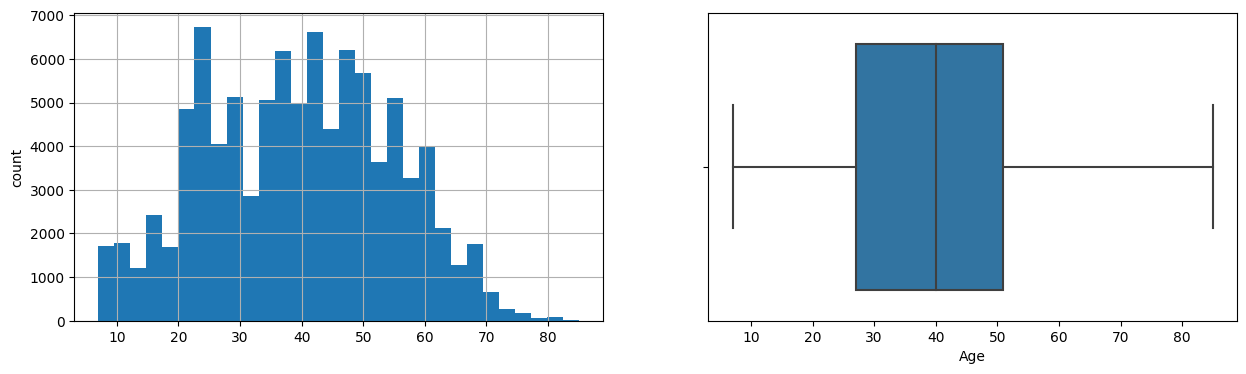

Skew : 0.47


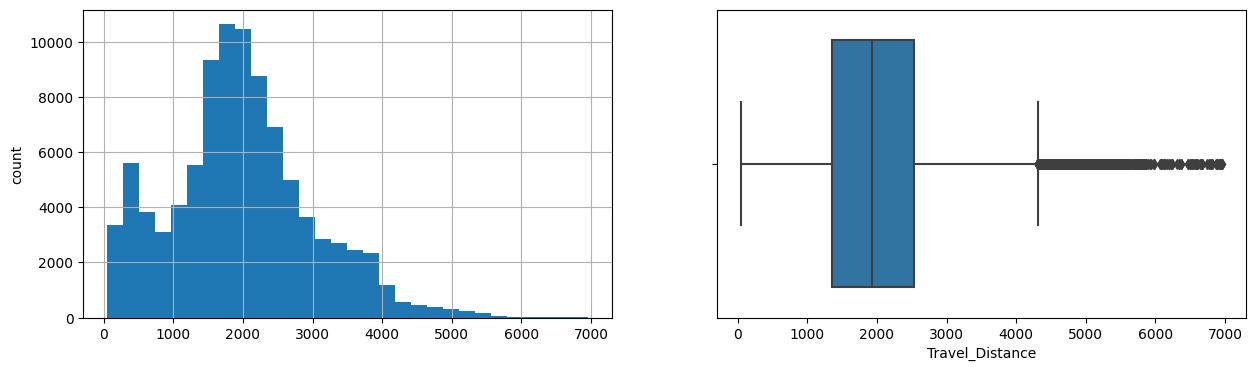

Skew : 6.41


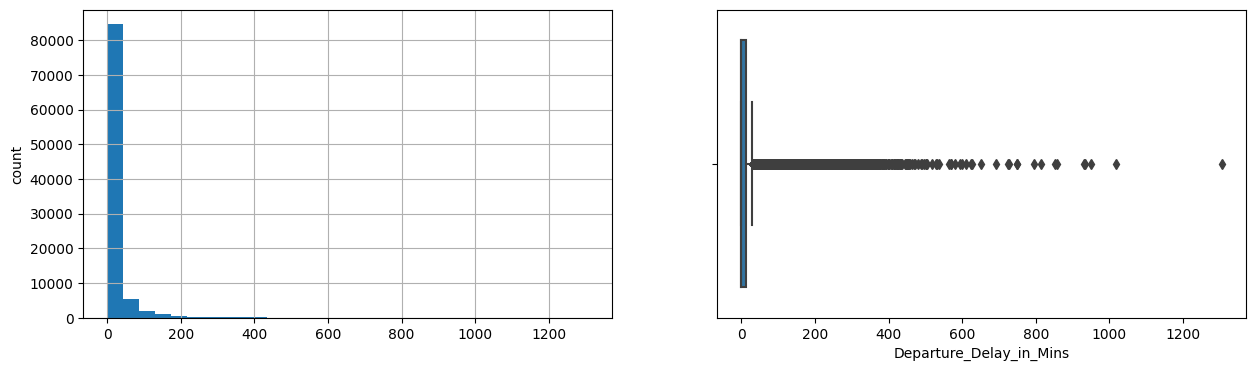

Skew : 6.24


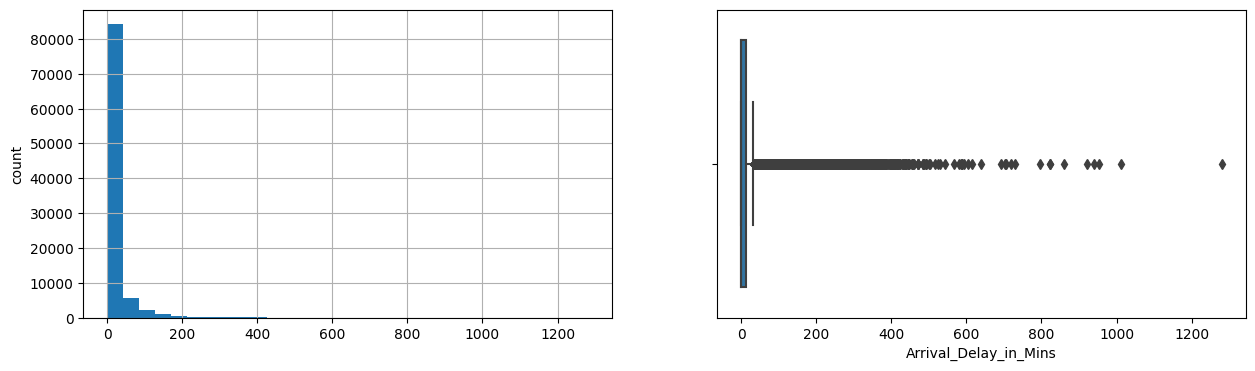

In [131]:
# Histogram plots of numerical columns 
for cols in num_col:   #list of numerical columns in Train
    print('Skew :',round(df_train[cols].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_train[cols].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=cols, data = df_train)
    plt.show()

In [133]:
# Checking summary of statistics
df_train[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,93995.0,39.419310,15.117705,7.0,27.0,40.0,51.0,85.0
Travel_Distance,93995.0,1978.891462,1028.053639,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,93995.0,14.621416,37.639774,0.0,0.0,0.0,12.0,1305.0
Arrival_Delay_in_Mins,93995.0,15.049535,38.107519,0.0,0.0,0.0,13.0,1280.0


In [98]:
#List of categorical columns
cat_col = df_train.select_dtypes(include=object).columns
cat_col

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

### Bivariate and Multivariate analysis

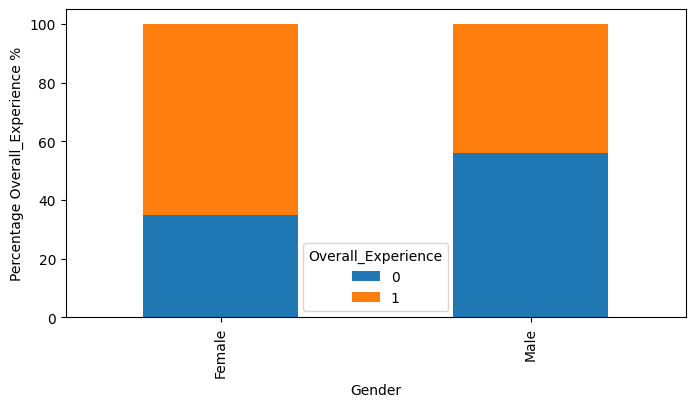

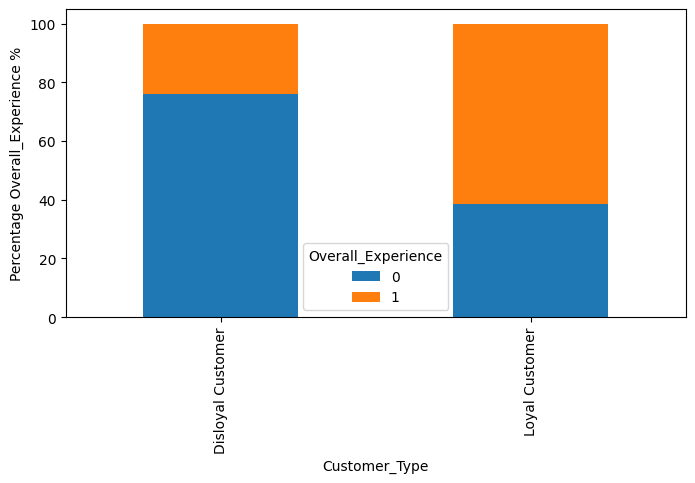

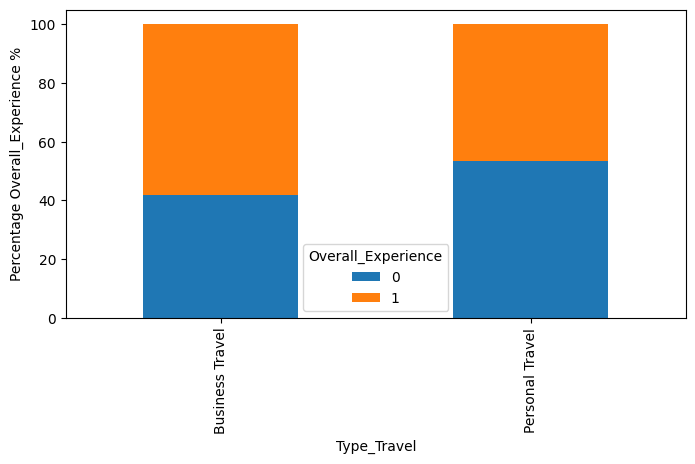

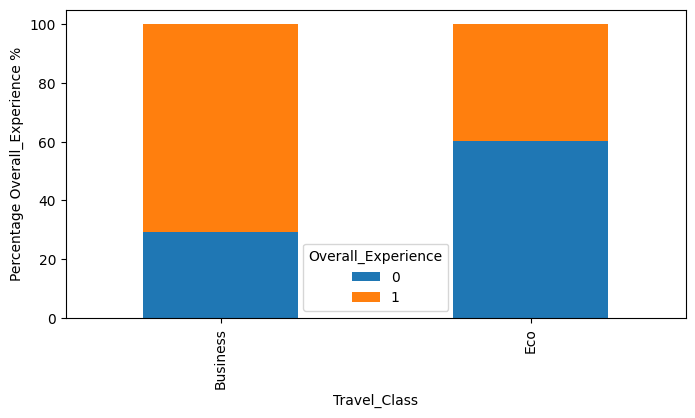

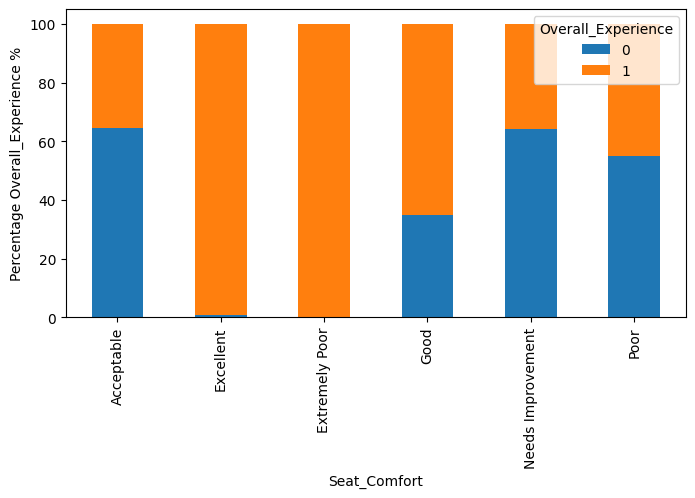

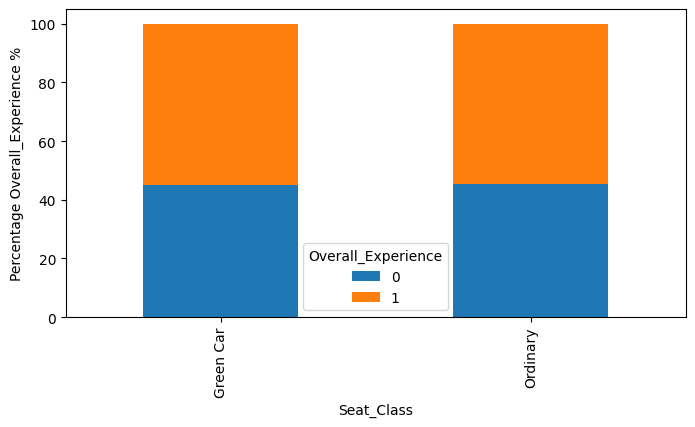

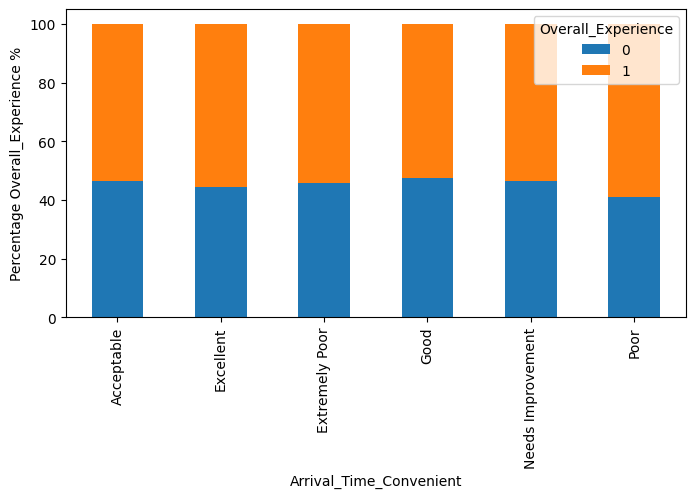

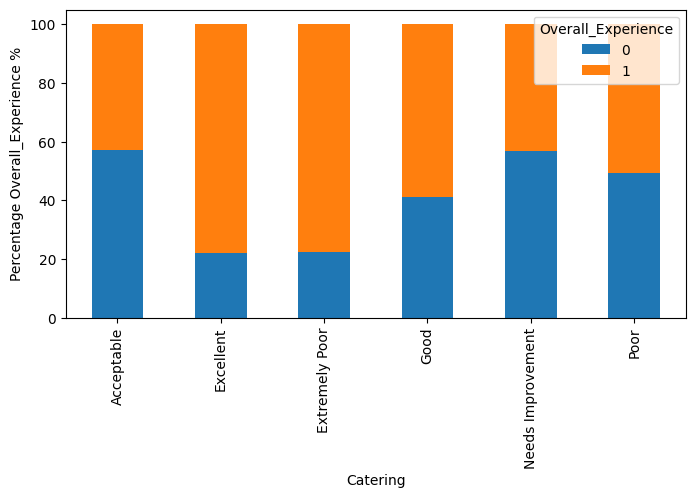

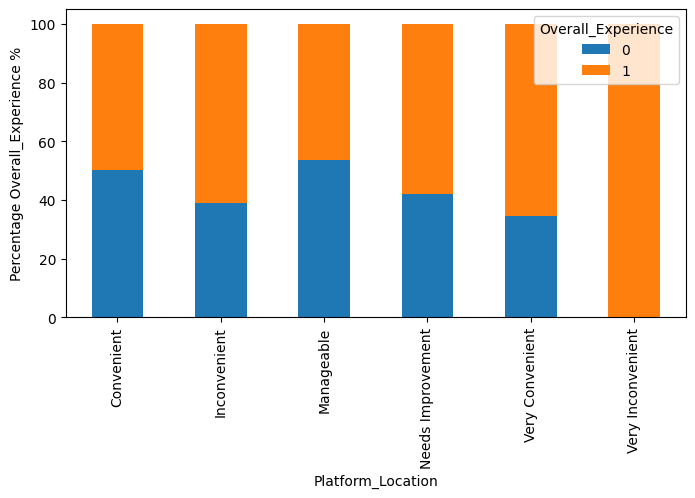

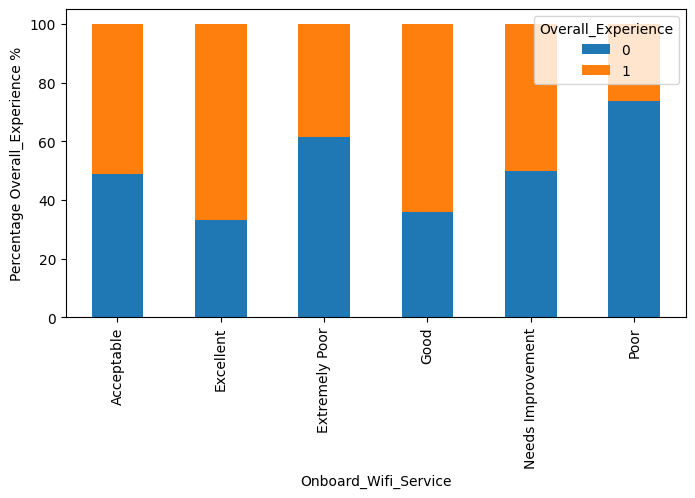

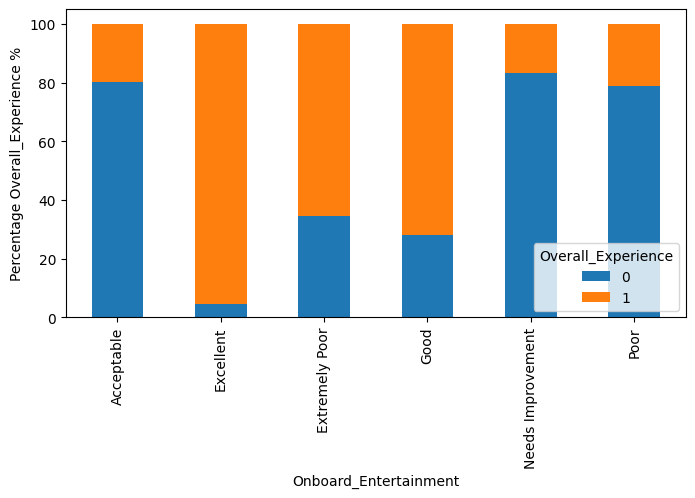

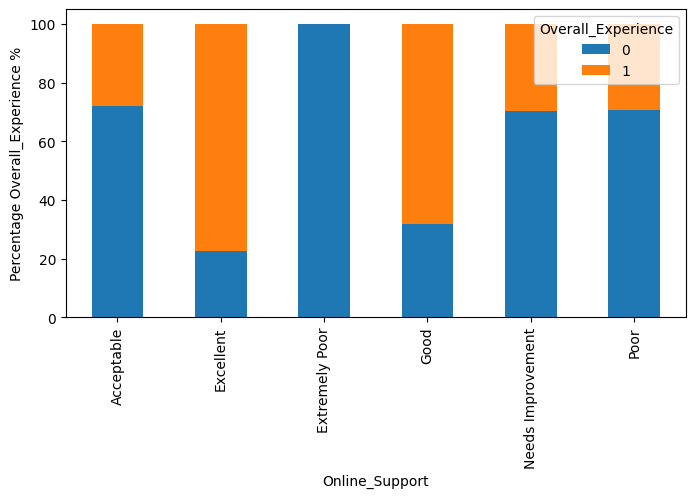

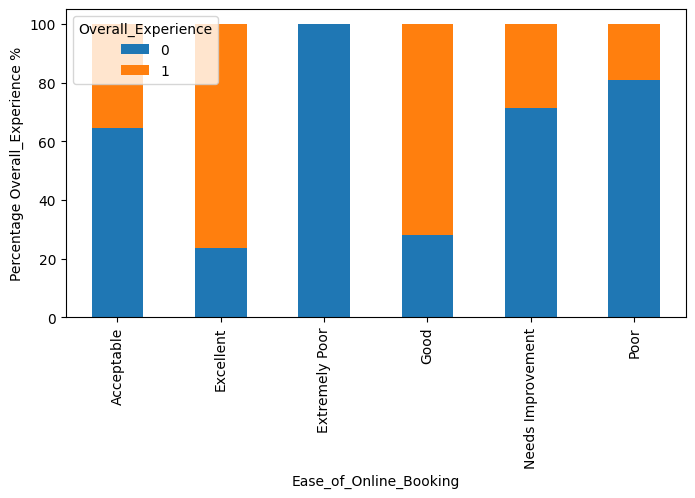

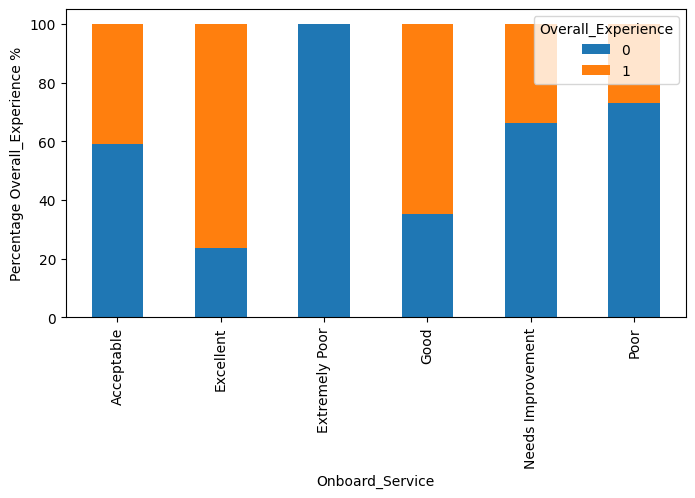

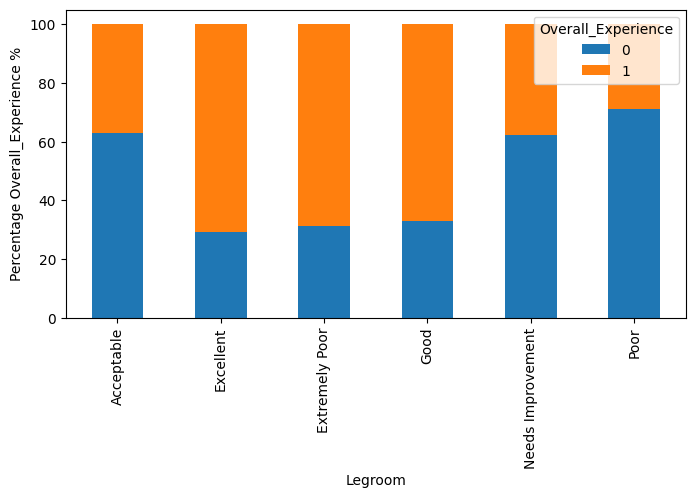

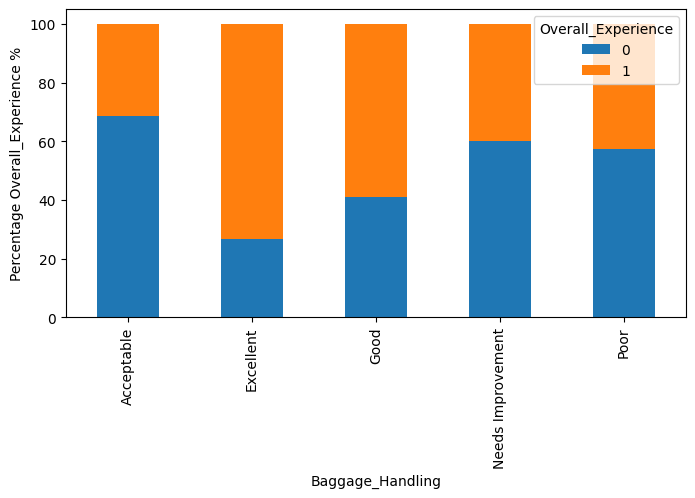

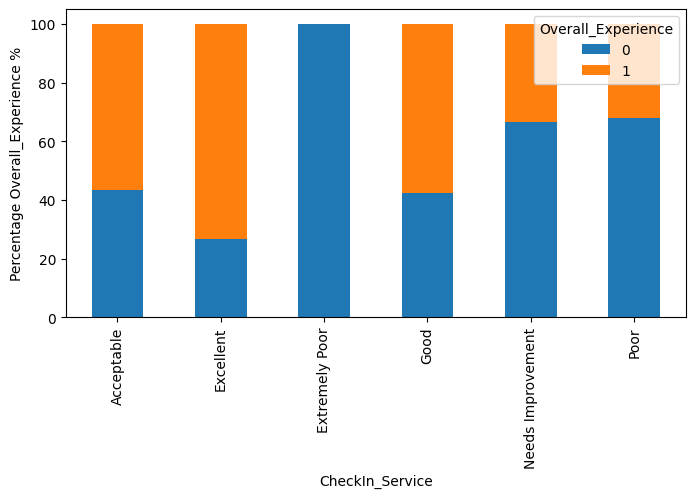

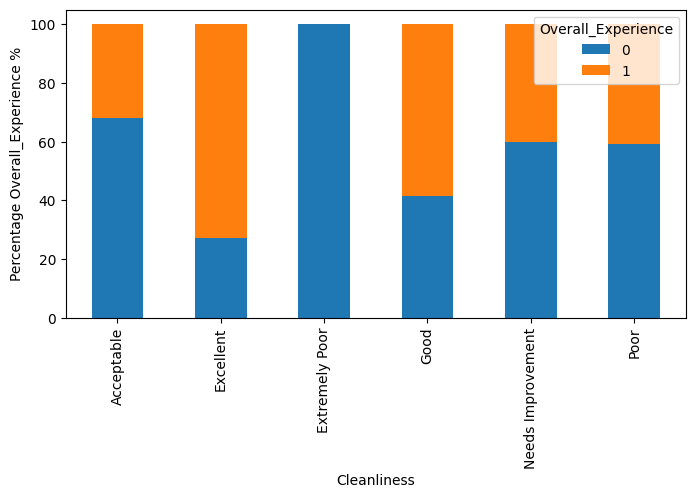

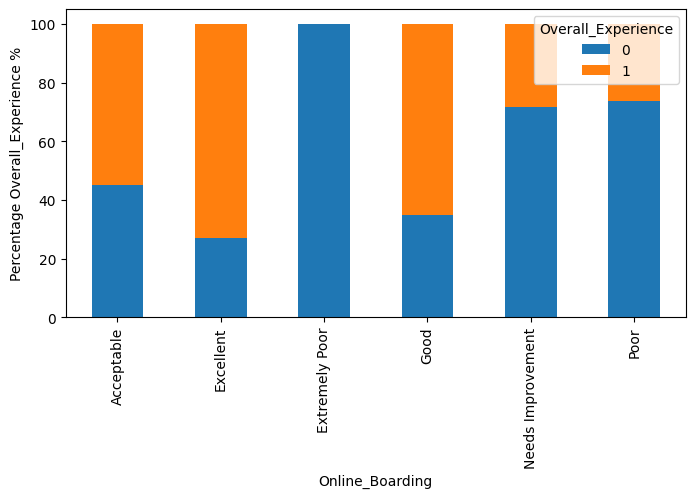

In [135]:
for i in cat_col:
    if i!='Overall_Experience':
        (pd.crosstab(df_train[i],df_train['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Overall_Experience %')

In [136]:
# Mean of numerical variables grouped by attrition
df_train.groupby(['Overall_Experience'])[num_col].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,
0,37.489946,2025.701602,17.676990,18.409563
1,41.019952,1940.056741,12.086445,12.261981


In [99]:
# Let's separate target and independent variables
# y_train dependent and x_train independent 
y_train = df_train[target]
x_train = df_train.drop(["Overall_Experience"], axis=1)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93995 entries, 98800001 to 98894379
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   93995 non-null  object 
 1   Customer_Type            85147 non-null  object 
 2   Age                      93995 non-null  float64
 3   Type_Travel              84836 non-null  object 
 4   Travel_Class             93995 non-null  object 
 5   Travel_Distance          93995 non-null  int64  
 6   Departure_Delay_in_Mins  93995 non-null  float64
 7   Arrival_Delay_in_Mins    93995 non-null  float64
 8   Seat_Comfort             93995 non-null  object 
 9   Seat_Class               93995 non-null  object 
 10  Arrival_Time_Convenient  85175 non-null  object 
 11  Catering                 85300 non-null  object 
 12  Platform_Location        93995 non-null  object 
 13  Onboard_Wifi_Service     93995 non-null  object 
 14  Onboard_Ente

In [161]:
ind_train = x_train.index
ind_test = x_test.index
print(ind_train)
print(ind_test)

df = pd.concat([x_train,x_test], axis=0)
df.tail()

Int64Index([98800001, 98800002, 98800003, 98800004, 98800005, 98800006,
            98800007, 98800008, 98800009, 98800010,
            ...
            98894370, 98894371, 98894372, 98894373, 98894374, 98894375,
            98894376, 98894377, 98894378, 98894379],
           dtype='int64', name='ID', length=93995)
Int64Index([99900001, 99900002, 99900003, 99900004, 99900005, 99900006,
            99900007, 99900008, 99900009, 99900010,
            ...
            99935593, 99935594, 99935595, 99935596, 99935597, 99935598,
            99935599, 99935600, 99935601, 99935602],
           dtype='int64', name='ID', length=35602)


,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,Green Car,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,Ordinary,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,Green Car,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,Ordinary,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0,Good,Ordinary,...,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


In [120]:
# By intitution, arrival delay and departure delay are related
# Let's drop one of them, the departure delay
df.drop(['Departure_Delay_in_Mins'], axis=1, inplace=True)

In [121]:
df.shape

(129597, 22)

In [123]:
# Encoding categorical values.
df = df.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], 
           [6, 5, 4, 3, 2, 1])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df = df.replace(['Business Travel', 'Personal Travel'], [1,0])
df = df.replace(['Business', 'Eco'], [1,0])
df = df.replace(['Green Car', 'Ordinary'], [1,0])
df = df.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], 
           [6, 5, 4, 3, 2, 1])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129597 entries, 98800001 to 99935602
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   129567 non-null  float64
 1   Customer_Type            117366 non-null  float64
 2   Age                      129586 non-null  float64
 3   Type_Travel              116990 non-null  float64
 4   Travel_Class             129597 non-null  int64  
 5   Travel_Distance          129597 non-null  int64  
 6   Arrival_Delay_in_Mins    129474 non-null  float64
 7   Seat_Comfort             129575 non-null  float64
 8   Seat_Class               129597 non-null  int64  
 9   Arrival_Time_Convenient  117452 non-null  float64
 10  Catering                 117545 non-null  float64
 11  Platform_Location        129585 non-null  float64
 12  Onboard_Wifi_Service     129585 non-null  float64
 13  Onboard_Entertainment    129589 non-null  float64


In [126]:
# Standardization of data for KNN imputing and classification with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [127]:
# Imputing missing values with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df_scaled)
arr = imputer.transform(df_scaled)

df_scaled = pd.DataFrame(arr, columns = df_scaled.columns, index = df_scaled.index)

df_scaled

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,-0.985495,0.472534,0.831386,0.670482,1.044469,-1.664186,-0.264770,-0.602137,0.997095,1.315631,...,0.569381,-1.028092,-0.397735,-1.127656,-1.154477,-0.376424,-1.466973,0.522916,-1.481820,-1.811435
1,1.014719,0.472534,0.566889,-1.491464,-0.957425,0.213081,-0.395578,-1.320241,-1.002913,1.315631,...,0.569381,-1.771216,0.367696,0.404399,1.207042,-1.150405,-2.331833,-1.063858,0.254943,0.498648
2,-0.985495,0.472534,0.236268,0.670482,1.044469,-0.895948,2.717650,-0.602137,0.997095,-0.650942,...,-0.947155,0.458155,1.133126,1.170427,1.207042,1.171539,1.127609,0.522916,1.123324,1.268675
3,-0.985495,0.472534,0.302392,0.670482,1.044469,-1.169554,0.075330,0.115966,-1.002913,-0.650942,...,-0.188887,-1.028092,-0.397735,-0.361628,-0.367304,-0.376424,-0.602112,0.522916,-0.613439,-0.271380
4,-0.985495,0.472534,0.699137,0.670482,1.044469,-0.000156,-0.395578,0.115966,-1.002913,0.004582,...,-0.947155,0.458155,1.133126,0.404399,0.419869,0.397558,0.262749,0.522916,0.254943,0.498648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129592,1.014719,0.472534,-2.078081,-1.491464,-0.957425,-0.630131,-0.395578,-0.602137,0.997095,1.315631,...,-0.188887,-1.028092,-0.397735,-0.361628,0.419869,1.171539,0.262749,-0.270471,0.254943,-0.271380
129593,-0.985495,0.472534,0.897510,0.670482,1.044469,-0.203657,-0.395578,-0.602137,-1.002913,-0.650942,...,-0.188887,1.201279,1.133126,0.404399,0.419869,0.397558,0.262749,-0.270471,0.254943,0.498648
129594,1.014719,-2.116248,-1.152341,0.670482,-0.957425,-0.780079,-0.395578,0.834070,0.997095,-1.961990,...,-0.947155,0.458155,-1.928595,-1.127656,-1.941649,-0.376424,-2.331833,-1.857245,1.123324,-1.041407
129595,-0.985495,0.472534,1.823249,-1.491464,-0.957425,-1.520081,0.023007,1.552173,-1.002913,1.315631,...,-0.188887,1.201279,0.367696,1.170427,1.207042,1.171539,1.127609,-0.270471,1.123324,0.498648


In [42]:
df_scaled.isnull().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [138]:
df_scaled.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,-0.985495,0.472534,0.831386,0.670482,1.044469,-1.664186,-0.264770,-0.602137,0.997095,1.315631,...,0.569381,-1.028092,-0.397735,-1.127656,-1.154477,-0.376424,-1.466973,0.522916,-1.481820,-1.811435
1,1.014719,0.472534,0.566889,-1.491464,-0.957425,0.213081,-0.395578,-1.320241,-1.002913,1.315631,...,0.569381,-1.771216,0.367696,0.404399,1.207042,-1.150405,-2.331833,-1.063858,0.254943,0.498648
2,-0.985495,0.472534,0.236268,0.670482,1.044469,-0.895948,2.717650,-0.602137,0.997095,-0.650942,...,-0.947155,0.458155,1.133126,1.170427,1.207042,1.171539,1.127609,0.522916,1.123324,1.268675
3,-0.985495,0.472534,0.302392,0.670482,1.044469,-1.169554,0.075330,0.115966,-1.002913,-0.650942,...,-0.188887,-1.028092,-0.397735,-0.361628,-0.367304,-0.376424,-0.602112,0.522916,-0.613439,-0.271380
4,-0.985495,0.472534,0.699137,0.670482,1.044469,-0.000156,-0.395578,0.115966,-1.002913,0.004582,...,-0.947155,0.458155,1.133126,0.404399,0.419869,0.397558,0.262749,0.522916,0.254943,0.498648


In [55]:
df_scaled.isnull().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

<Axes: >

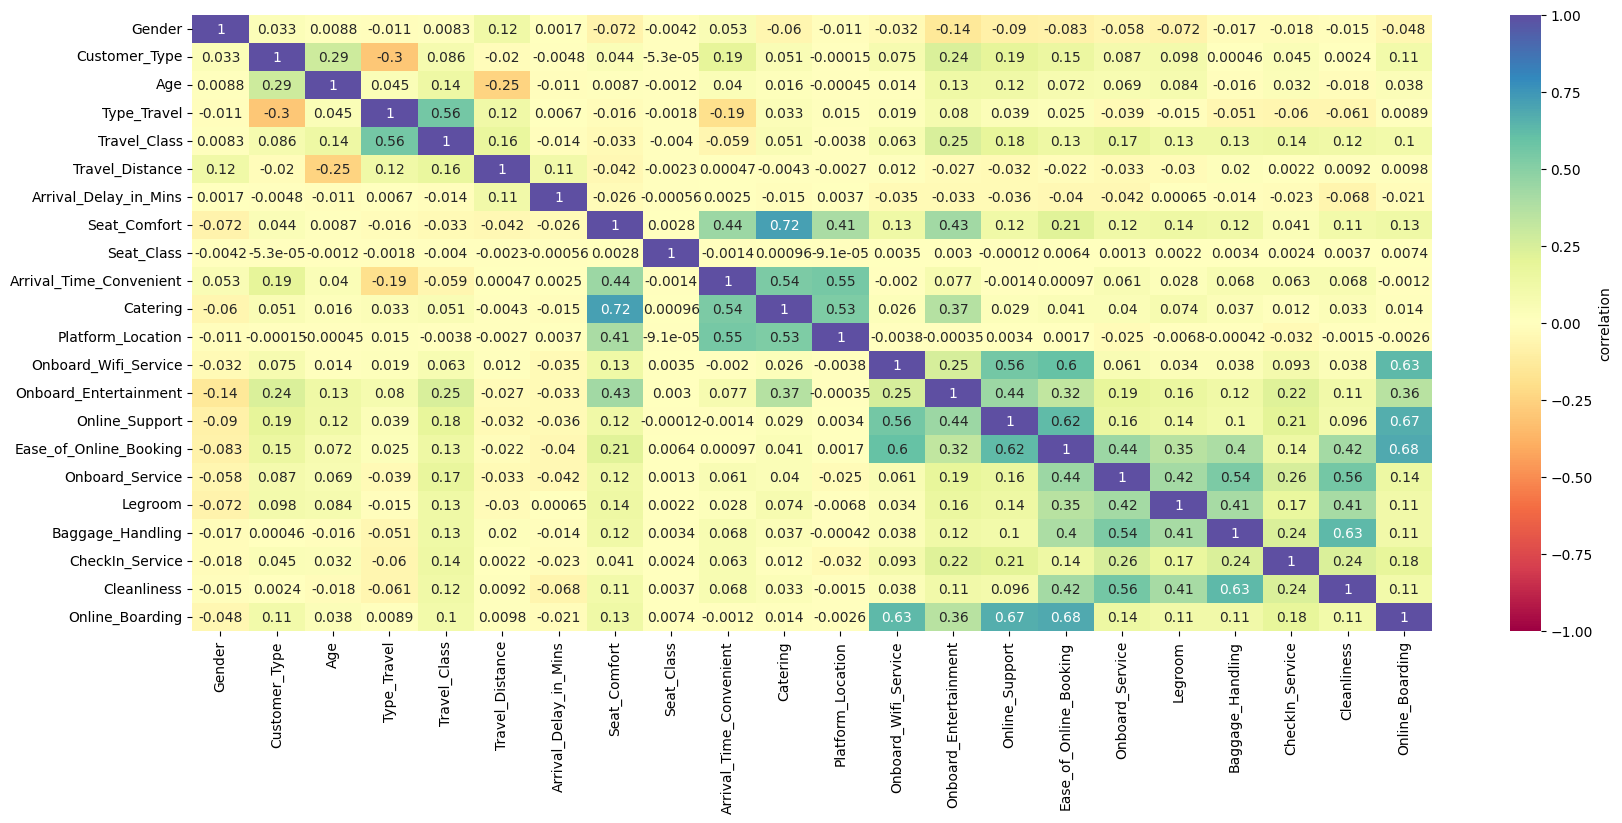

In [140]:
# Correlation for numerical_columns and heatmap
df_scaled_corr = df_scaled.corr()

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_scaled_corr, vmin=-1, vmax=1, cmap = "Spectral", 
xticklabels=True, yticklabels=True, annot = True, cbar_kws={'label' : 'correlation'}, ax=ax) 

In [177]:
#7. Get train and test data set back
x_train = df_scaled.iloc[:len(ind_test),:]
x_test = df_scaled.loc[len(ind_test):,:]
x_test.shape

(93995, 22)

## Model used in classification
### Random Forest with Cross-Validation
  

In [167]:
# summarize the dataset
print(x_train.shape, y_train.shape)
print(type(x_train),type(y_train))

(93995, 22) (93995, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [169]:
# Import packages
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define the model RandomForestClassifier
rand_forest_classifier_cv = RandomForestClassifier()
# evaluate the model with repeated stratified K-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(rand_forest_classifier_cv, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.955 (0.002)


In [170]:
# make predictions using random forest cross-validation for classification

# fit the model on the x_train dataset
rand_forest_classifier_cv.fit(x_train, y_train)

RandomForestClassifier()

# SUBMISSION

In [174]:
# Predic the target in test dataset
model = rand_forest_classifier_cv
sub = pd.DataFrame(x_test)

res = model.predict(x_test)

sub["Overall_Experience"] = res
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("Kmeansubmission1.csv", index = True)
sub_to_file

,Overall_Experience
93995,1
93996,1
93997,1
93998,0
93999,1
...,...
129592,0
129593,1
129594,0
129595,1
